<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/Plotting_DuctalEndothelial_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting CIP -- ductal and endothelial

#ran 20230417 Sup Figure 9A, 9B


## link Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Installing packages on Colab

In [2]:
!pip install setuptools-scm install scipy scanpy anndata leidenalg watermark pandas==1.5.3 numpy==1.22.4 umap-learn==0.5.3 plotnine==0.8.0 panel muon rpy2==3.4.5 anndata2ri ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.7/292.7 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.4 MB/s eta 0:00:00
  Preparing metada

In [3]:
!sudo apt-get install -y libharfbuzz-dev libharfbuzz-dev libfribidi-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libblkid1 libcairo-script-interpreter2
  libffi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev libmount1
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
The following packages will be upgr

In [4]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 123950 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [5]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 1s (2,180 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot b

In [6]:
!rm ~/.cache/matplotlib -rf

In [7]:
%%capture
%%!
git clone https://github.com/has2k1/scikit-misc.git
cd scikit-misc
python setup.py install

In [8]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


#Load font

In [9]:
!rm ~/.cache/matplotlib -rf

In [10]:
import matplotlib.font_manager as fm

In [11]:
print(fm.findfont('Arial'))

/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf


## Import packages

If you want modules to be automatically reloaded when you call them, use `autoreload`:

In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
import scanpy as sc
import numpy as np
import re
import os
import pandas as pd
import seaborn as sb
import matplotlib
import scipy.sparse as sp
from scipy.sparse import issparse
import anndata2ri
import re

import matplotlib as mpl
from scipy import stats as scistats
import matplotlib.pyplot as pl
import scanpy.external as sce
from matplotlib import colors
from pathlib import Path
from ipywidgets import interactive

import muon as mu
from muon import prot as pt

%matplotlib inline

In [14]:
%pprint
import time
timestr = time.strftime("%d%m%Y-%H%M%S")
print(timestr)

Pretty printing has been turned OFF
16062023-200446


In [15]:
# R integration
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

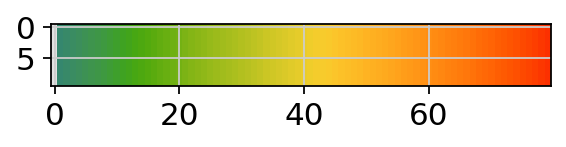

In [16]:
import colorcet as cc

xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
colorsComb = np.vstack([pl.cm.Greys_r(np.linspace(0.8,0.1, 1)), cc.cm.rainbow_bgyr_35_85_c72(np.linspace(0.2,1, 100))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
pl.imshow(xs, cmap=mymap);  # use tab completion to choose

In [17]:
%cd /content/

/content


#Print package versions

In [18]:
%load_ext watermark
%watermark
%watermark --iversions -v -m -p numpy,scipy,sklearn,anndata,scanpy,muon,anndata2ri,rpy2,triku

Last updated: 2023-06-16T20:04:47.978052+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy     : 1.22.4
scipy     : 1.10.1
sklearn   : 1.2.2
anndata   : 0.9.1
scanpy    : 1.9.3
muon      : 0.1.5
anndata2ri: 1.1
rpy2      : 3.4.5
triku     : not installed

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

logging   : 0.5.1.2
matplotlib: 3.5.0
rpy2      : 3.4.5
numpy     : 1.22.4
pandas    : 1.5.3
scanpy    : 1.9.3
scipy     : 1.10.1
anndata2ri: 1.1
muon      : 0.1.5
re        : 2.2.1
google    : 2.0.3
seaborn   : 0.12.2
colorcet  : 3.0.1



## Set global parameters

Set some plotting parameters.

In [19]:
sc._settings.ScanpyConfig.n_jobs=8

pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1


Set other global parameters

In [20]:
random_state=42
# should figures just be displayed or also saved?
save_figure = False

# should cashed values be used, or recompute?
force_recompute = False

In [21]:
#@title load accesory funtions
#@markdown
"""Functions for downstream work with outputs of remove-background."""

import tables
import numpy as np
import scipy.sparse as sp
from typing import Dict


def dict_from_h5(file: str) -> Dict[str, np.ndarray]:
    """Read in everything from an h5 file and put into a dictionary."""
    d = {}
    with tables.open_file(file) as f:
        # read in everything
        for array in f.walk_nodes("/", "Array"):
            d[array.name] = array.read()
    return d


def anndata_from_h5(file: str,
                    analyzed_barcodes_only: bool = True) -> 'anndata.AnnData':
    """Load an output h5 file into an AnnData object for downstream work.

    Args:
        file: The h5 file
        analyzed_barcodes_only: False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.

    Returns:
        adata: The anndata object, populated with inferred latent variables
            and metadata.

    """

    try:
        import anndata
    except ImportError:
        raise ImportError('The anndata package must be installed to use the '
                          'function anndata_from_h5()')

    d = dict_from_h5(file)
    X = sp.csc_matrix((d.pop('data'), d.pop('indices'), d.pop('indptr')),
                      shape=d.pop('shape')).transpose().tocsr()

    if analyzed_barcodes_only:
        if 'barcodes_analyzed_inds' in d.keys():
            X = X[d['barcodes_analyzed_inds'], :]
            d['barcodes'] = d['barcodes'][d['barcodes_analyzed_inds']]
        elif 'barcode_indices_for_latents' in d.keys():
            X = X[d['barcode_indices_for_latents'], :]
            d['barcodes'] = d['barcodes'][d['barcode_indices_for_latents']]
        else:
            print('Warning: analyzed_barcodes_only=True, but the key '
                  '"barcodes_analyzed_inds" or "barcode_indices_for_latents" '
                  'is missing from the h5 file. '
                  'Will output all barcodes, and proceed as if '
                  'analyzed_barcodes_only=False')

    # Construct the count matrix.
    adata = anndata.AnnData(X=X,
                            obs={'barcode': d.pop('barcodes').astype(str)},
                            var={'gene_name': (d.pop('gene_names') if 'gene_names' in d.keys()
                                               else d.pop('name')).astype(str)})
    adata.obs.set_index('barcode', inplace=True)
    adata.var.set_index('gene_name', inplace=True)

    # Add other information to the adata object in the appropriate slot.
    for key, value in d.items():
        try:
            value = np.asarray(value)
            if len(value.shape) == 0:
                adata.uns[key] = value
            elif value.shape[0] == X.shape[0]:
                if (len(value.shape) < 2) or (value.shape[1] < 2):
                    adata.obs[key] = value
                else:
                    adata.obsm[key] = value
            elif value.shape[0] == X.shape[1]:
                if value.dtype.name.startswith('bytes'):
                    adata.var[key] = value.astype(str)
                else:
                    adata.var[key] = value
            else:
                adata.uns[key] = value
        except Exception:
            print('Unable to load data into AnnData: ', key, value, type(value))

    if analyzed_barcodes_only:
        for col in adata.obs.columns[adata.obs.columns.str.startswith('barcodes_analyzed')
                                     | adata.obs.columns.str.startswith('barcode_indices')]:
            try:
                del adata.obs[col]
            except Exception:
                pass

    return adata


def load_anndata_from_input_and_output(input_file: str,
                                       output_file: str,
                                       analyzed_barcodes_only: bool = True,
                                       input_layer_key: str = 'cellranger') -> 'anndata.AnnData':
    """Load remove-background output count matrix into an anndata object,
    together with remove-background metadata and the raw input counts.

    Args:
        input_file: Raw h5 file used as input for remove-background.
        output_file: Output h5 file created by remove-background (can be
            filtered or not).
        analyzed_barcodes_only: Argument passed to anndata_from_h5().
            False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.
        input_layer_key: Key of the anndata.layer that is created for the raw
            input count matrix.

    Return:
        adata_out: AnnData object with counts before and after remove-background,
            as well as inferred latent variables from remove-background.

    """

    # Load input data.
    adata_raw = anndata_from_h5(input_file, analyzed_barcodes_only=False)

    # Load remove-background output data.
    adata_out = anndata_from_h5(output_file, analyzed_barcodes_only=analyzed_barcodes_only)

    # Subset the raw dataset to the relevant barcodes.
    adata_raw = adata_raw[adata_out.obs.index]

    # Put count matrices into 'layers' in anndata for clarity.
    adata_out.layers[input_layer_key] = adata_raw.X.copy()
    adata_out.layers['cellbender'] = adata_out.X.copy()

    # Pre-compute a bit of metadata.
    adata_out.var['n_cellranger'] = np.array(adata_out.layers['cellranger'].sum(axis=0)).squeeze()
    adata_out.var['n_cellbender'] = np.array(adata_out.layers['cellbender'].sum(axis=0)).squeeze()

    return adata_out

#load data

In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/CIP_all/FullDataset/'

samplename='CIP_all_v3_noW6_8_'
random_state=42


import os
os.chdir(folder)
if not os.path.exists('./figures/'):
    os.makedirs('./figures/')

if not os.path.exists('./noW6_8/'):
    os.makedirs('./noW6_8/')

folder='/content/drive/MyDrive/CIP_v3_data/CIP_all/FullDataset/noW6_8/'

if not os.path.exists('./markers/'):
    os.makedirs('./markers/')

In [ ]:
adata_all=sc.read('datasets/CIP_all_v3_no_W6_8__filteredNormalized_annotated_2023-02-14.h5ad')

In [ ]:
fm.rcParams['font.family']=['Arial']
sb.set_context('talk')
pl.rcParams['figure.figsize']=(7,7)
pl.rcParams['figure.dpi']=200

#Sample colors

In [ ]:
colors_time=['#88a0dc', '#381a61', '#7c4b73', '#ed968c', '#ab3329', '#e78429', '#f9d14a']

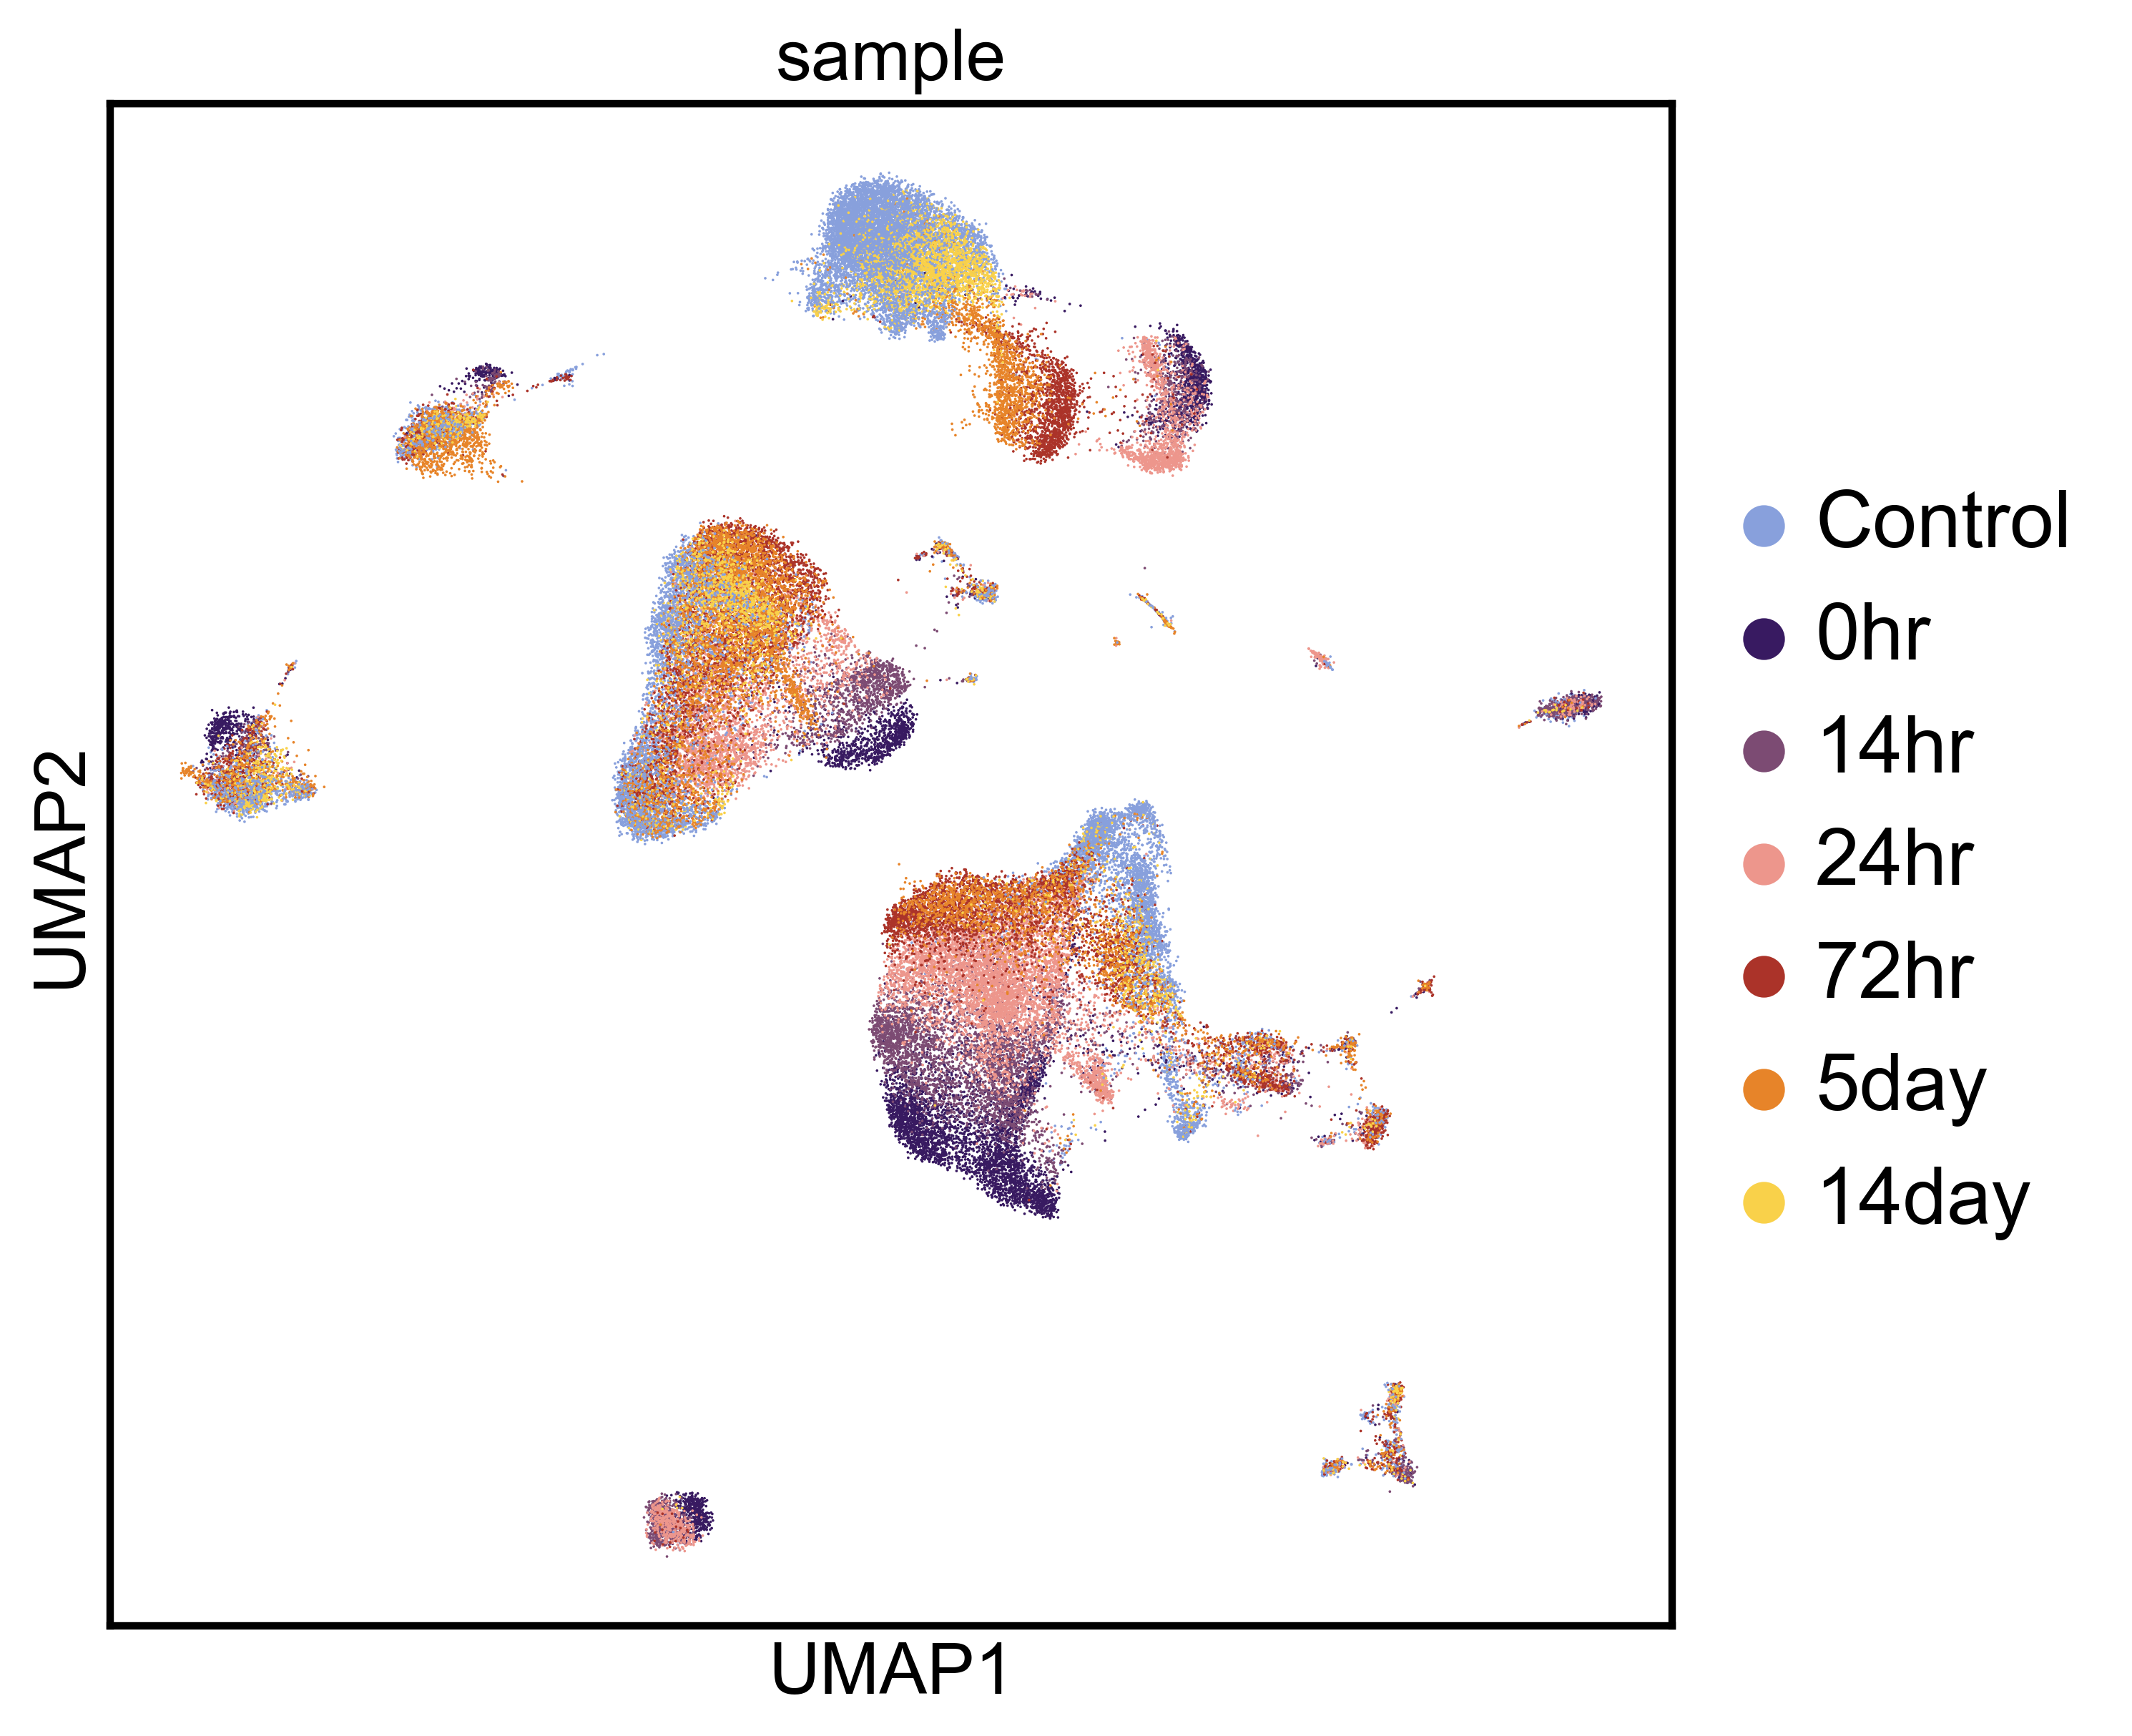

In [ ]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(7,7)
sc.pl.umap(adata, color=['sample'], palette=colors_time,legend_loc='right margin',legend_fontoutline=3,vmax='p99.9',legend_fontsize=20, legend_fontweight='normal',frameon=True)

#Ductal

In [ ]:
adata=adata_all[adata_all.obs['annotated'].isin(['Ductal']),:].copy()

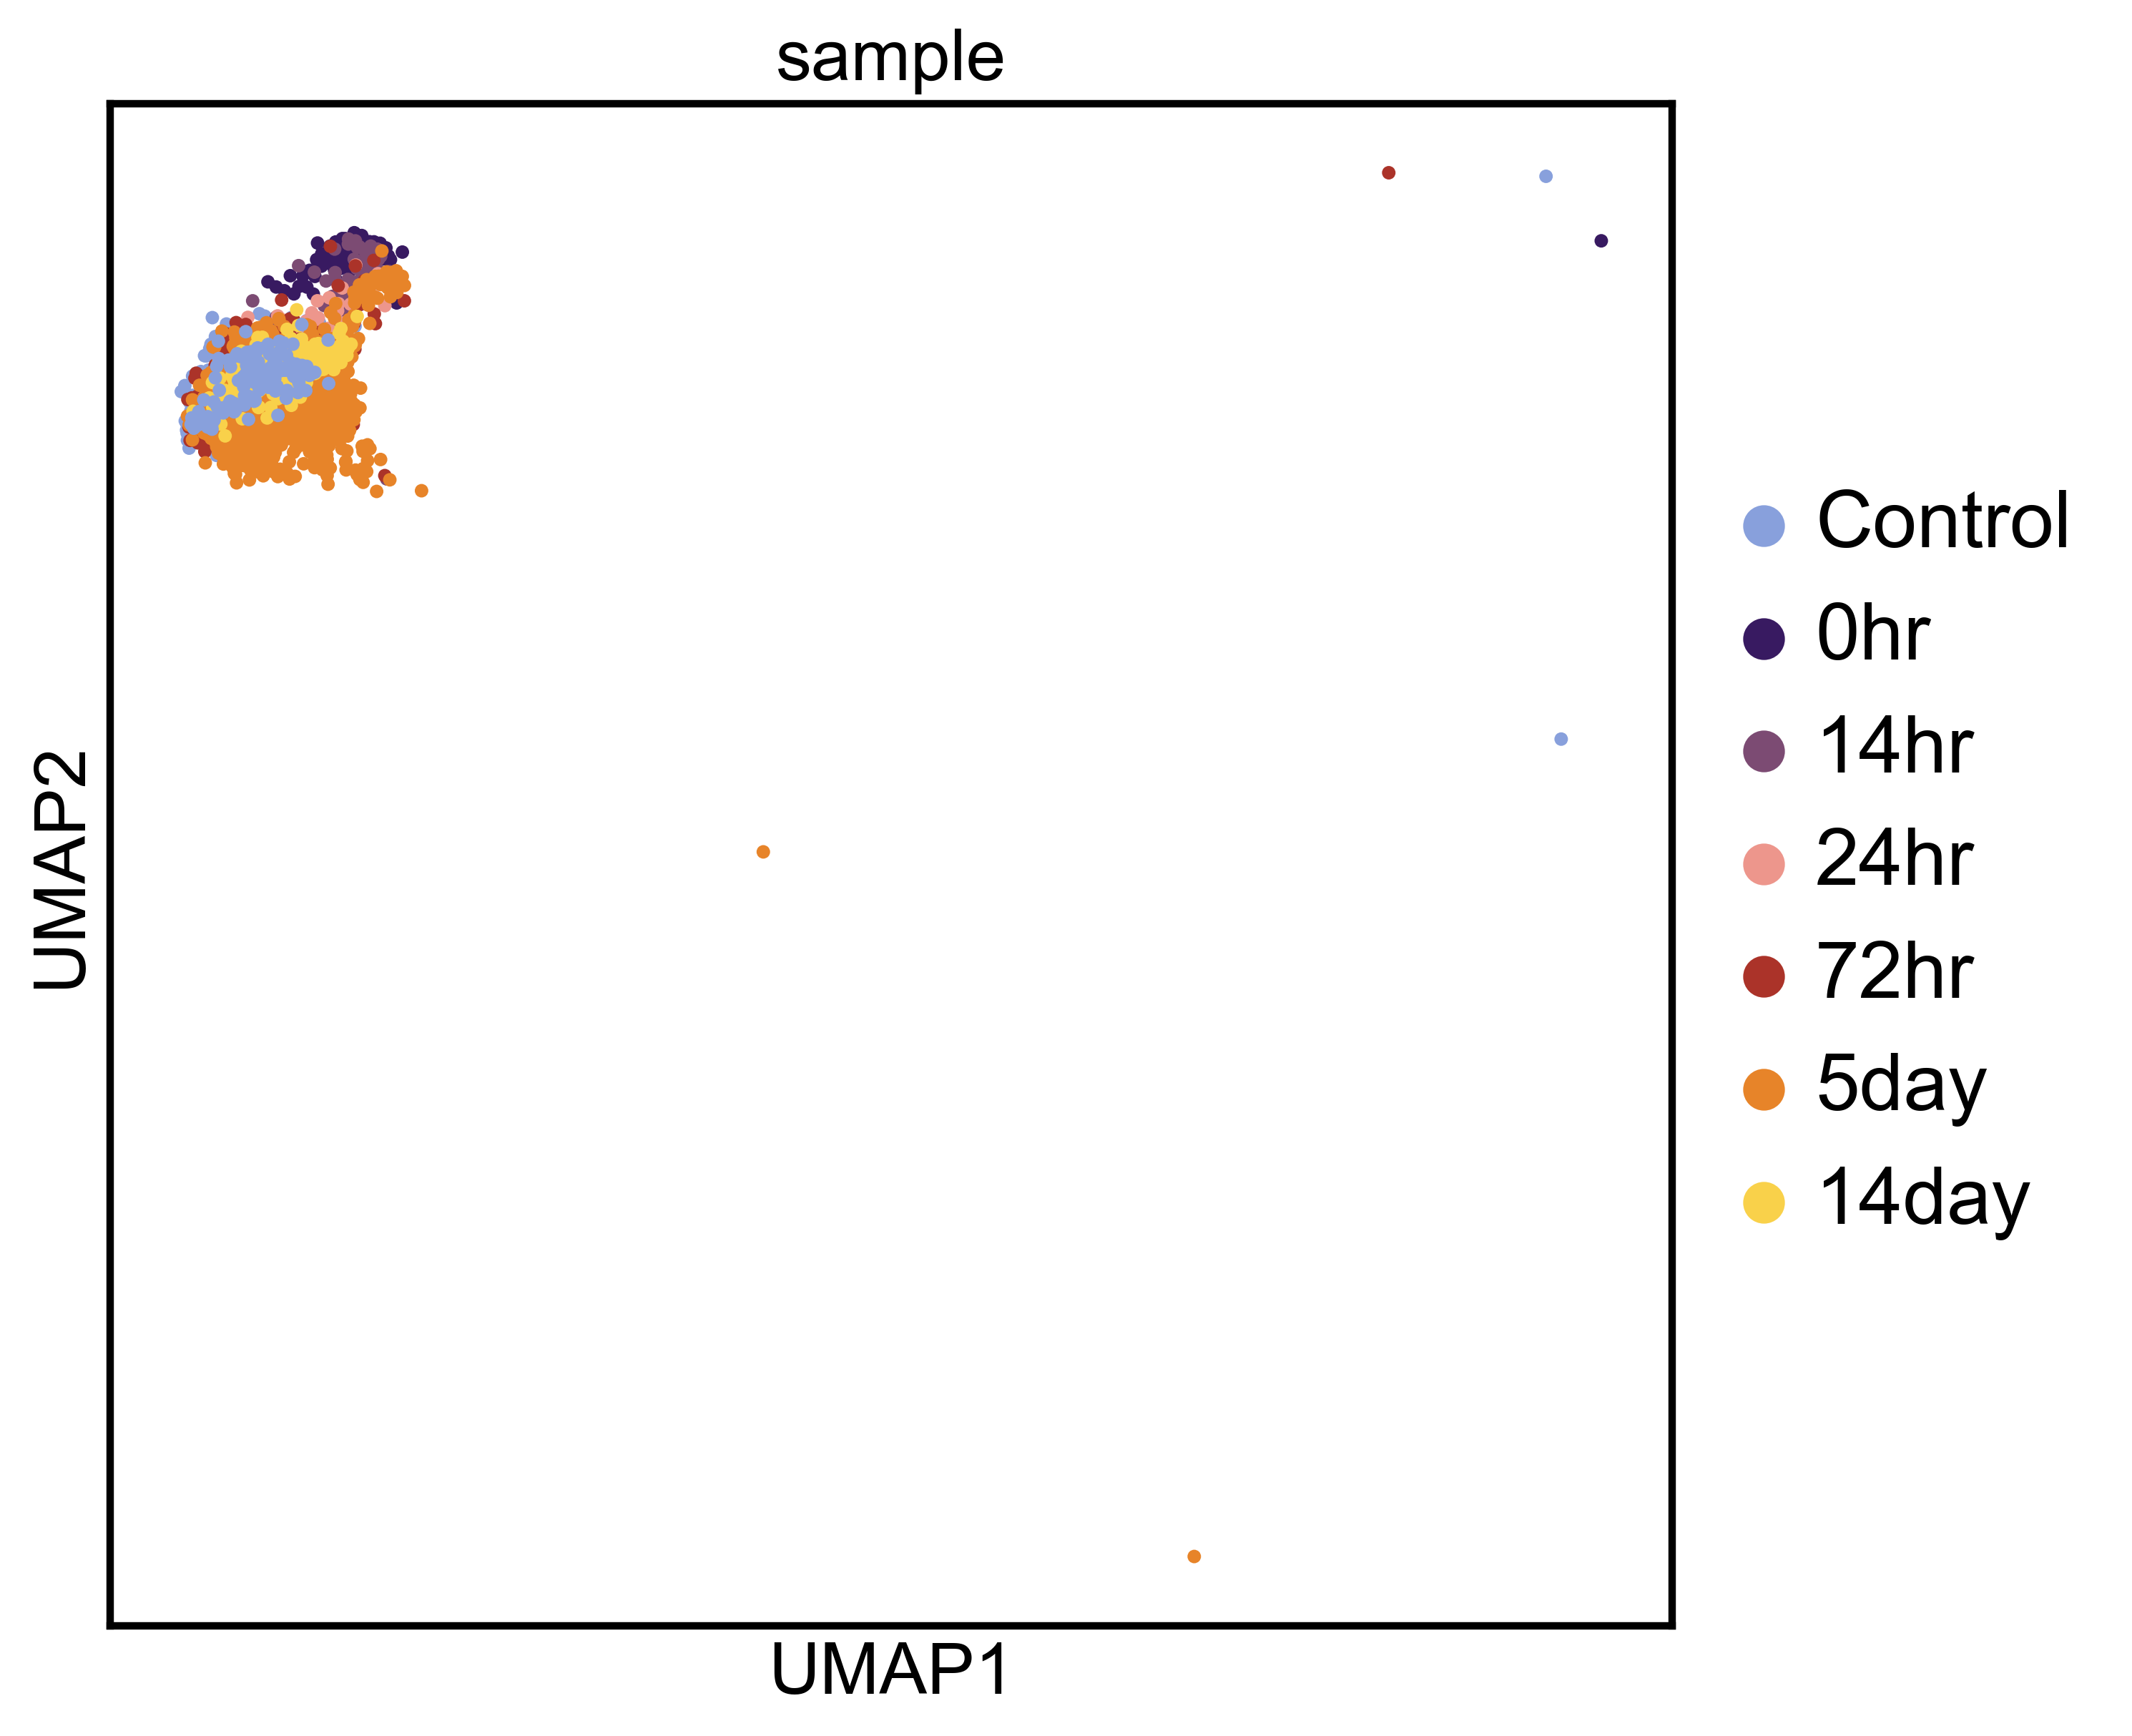

In [ ]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(7,7)
sc.pl.umap(adata, color=['sample'], palette=colors_time,legend_loc='right margin',legend_fontoutline=3,vmax='p99.9',legend_fontsize=20, legend_fontweight='normal',frameon=True)

##Renormalize subset


In [ ]:
adata.layers["counts"] = adata.layers['cellbender']
adata.X=adata.layers["counts"]
adata.layers["log_norm"]=sc.pp.log1p(sc.pp.normalize_total(adata,inplace=False,target_sum=1e4)["X"])
# proportional fitting to mean of cell depth
proportional_fitting = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])

In [ ]:
adata.layers["PFlog1pPF_normalization"] = sc.pp.normalize_total(adata, target_sum=None, layer="log1pPF_normalization", inplace=False)["X"]


In [ ]:

adata1= adata[adata.obs['sample'].isin(['Control','0hr']),:].copy()
adata1

AnnData object with n_obs × n_vars = 984 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable'
    uns: 'QC_colors', 'an

####annotated_fine

In [ ]:
cluster_by="sample"

In [ ]:
# #method : {‘logreg’, ‘t-test’, ‘wilcoxon’, ‘t-test_overestim_var’} | None (default: None)
sc.tl.rank_genes_groups(adata1, cluster_by, method='wilcoxon',n_genes=adata.shape[1],layer='PFlog1pPF_normalization', rankby_abs=False,corr_method='bonferroni',key_added=f"wilcoxon_rank_groups_{cluster_by}" )
wilcoxon=pd.DataFrame(adata1.uns[f"wilcoxon_rank_groups_{cluster_by}"]['names']).head(100)
wilcoxon

Control       0hr
0       Apoe      Lcn2
1       Fmo2     Il1rn
2      Ces1d       Msn
3     Atp1b1     Anxa3
4      Itm2b        C3
..       ...       ...
95      Idh2     Uchl3
96      Sgk1      Ehd4
97  Arhgap24     Myo1c
98     Rpl21  Tmem120a
99      Bmyc  Ppp1r14b

[100 rows x 2 columns]

In [ ]:
#wilcoxon
n= 50
wilcoxon=pd.DataFrame(adata1.uns[f"wilcoxon_rank_groups_{cluster_by}"]['names']).head(n)
markers=wilcoxon
wilcoxon1=markers.to_dict('list')


In [ ]:
markers=wilcoxon1['0hr']

In [ ]:
markers=['Lcn2', 'Il1rn', 'C3', 'Cd14', 'Mmp7', 'Cxcl16', 'Nupr1',  'S100a6', 'Il34', 'Timp1','Cldn2', 'Pdgfb',
  'Msn', 'Anxa3','Actn1', 'Cd44', 'Lars2', 'Tpm4', '2200002D01Rik', 'Il31ra',
 'Clic4', 'Fabp5', 'Ldha', 'Cldn4', 'Sbno2', 'Noct', 'Slc12a2', 'Pmepa1', 'Itgav', 'Mt2', 'Itga3',
 'Plscr1', 'Pdlim7',  'Ppa1', 'Cmss1', 'Anxa2', 'Rgs5', 'Arpc1b', 'Heg1', 'Ets1', 'Socs2',
 'Camk1d', 'Lrg1', 'Tpm1', 'Ccn2', 'Dap', 'Flna', 'Akap12', 'Slc39a1', 'S100a11']


In [ ]:
topmarkers=['Lcn2', 'Il1rn', 'C3', 'Cd14', 'Mmp7', 'Cxcl16', 'Nupr1',  'S100a6', 'Il34', 'Cldn2', 'Pdgfb']


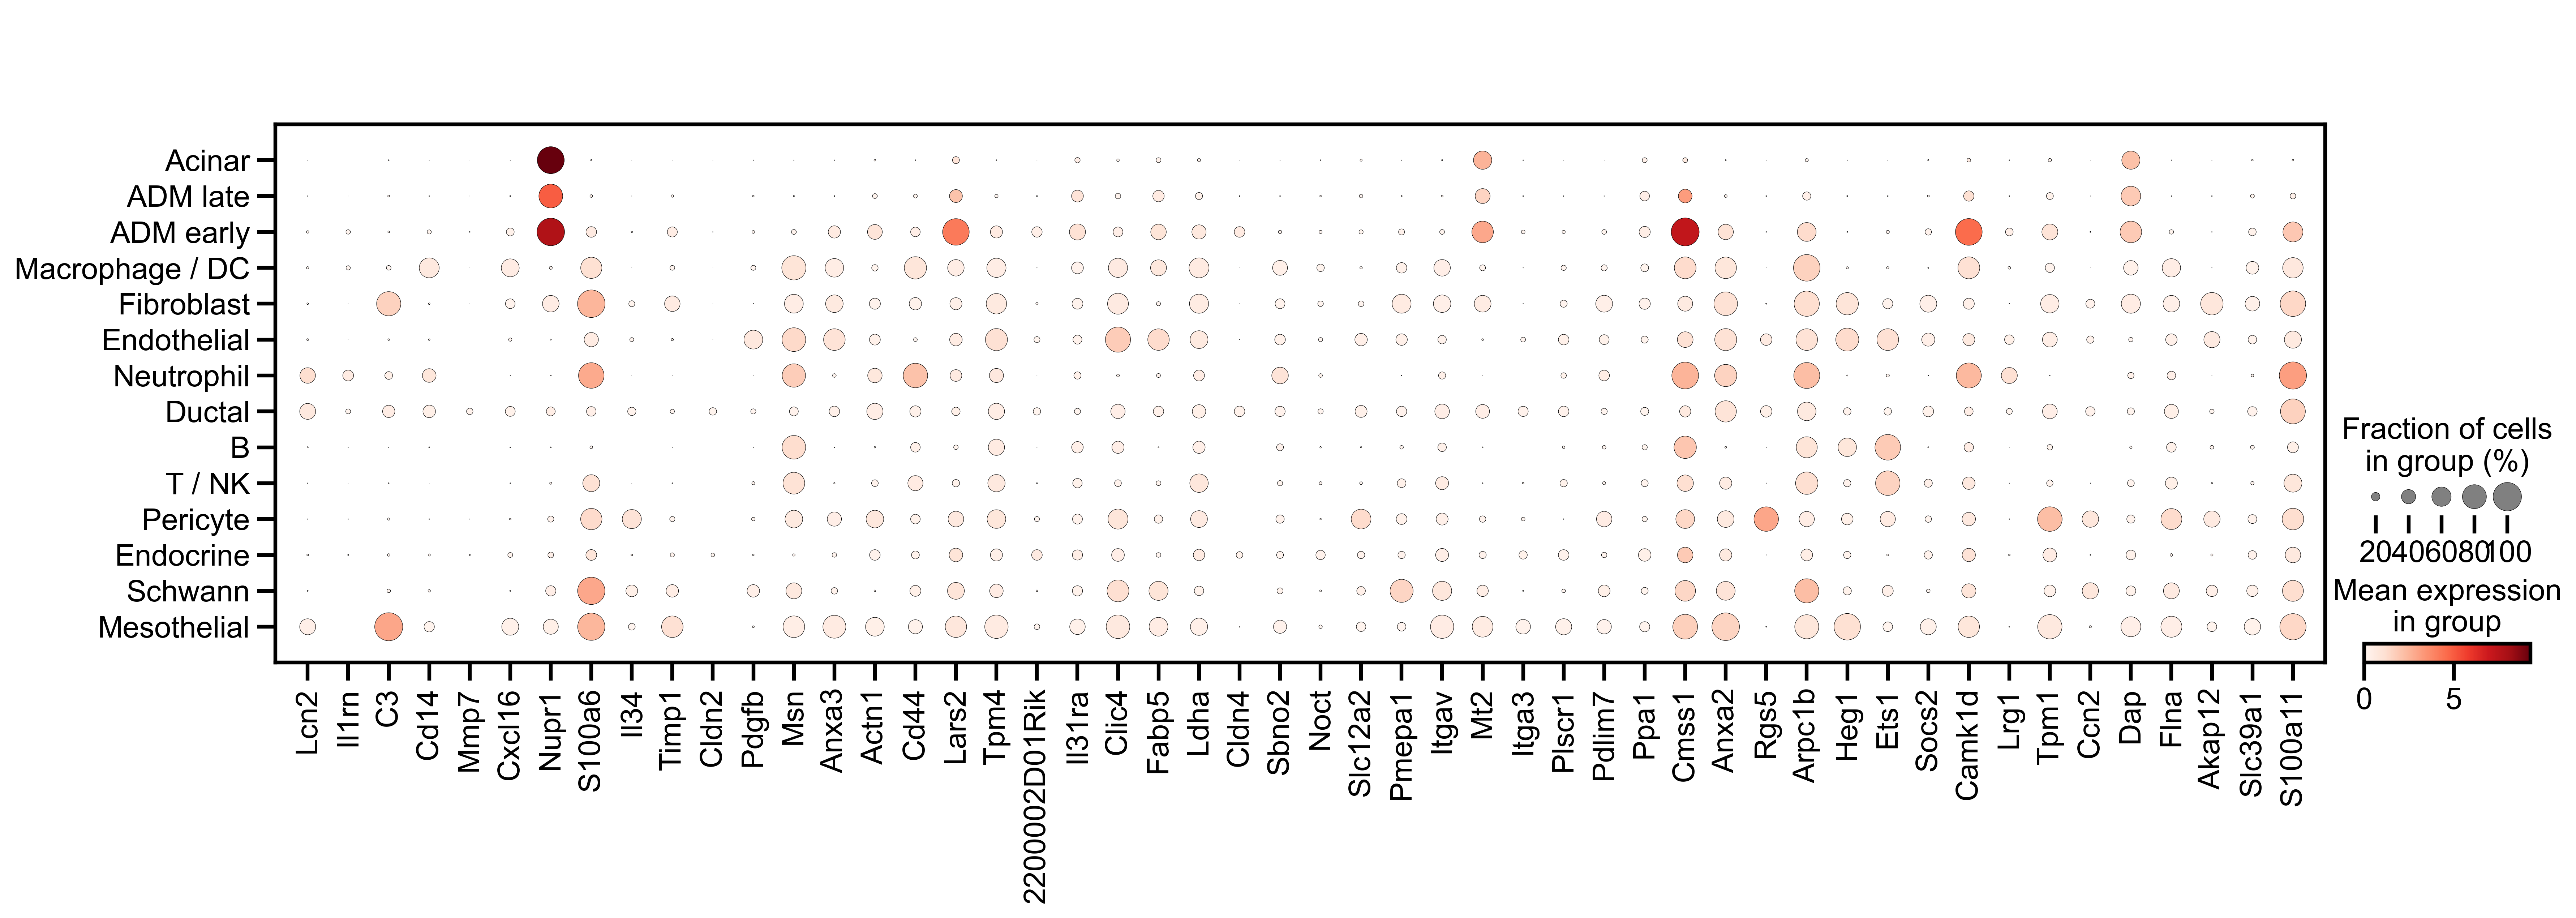

In [ ]:
sc.pl.dotplot(adata_all, markers,groupby='annotated_ADM',layer='PFlog1pPF_normalization')

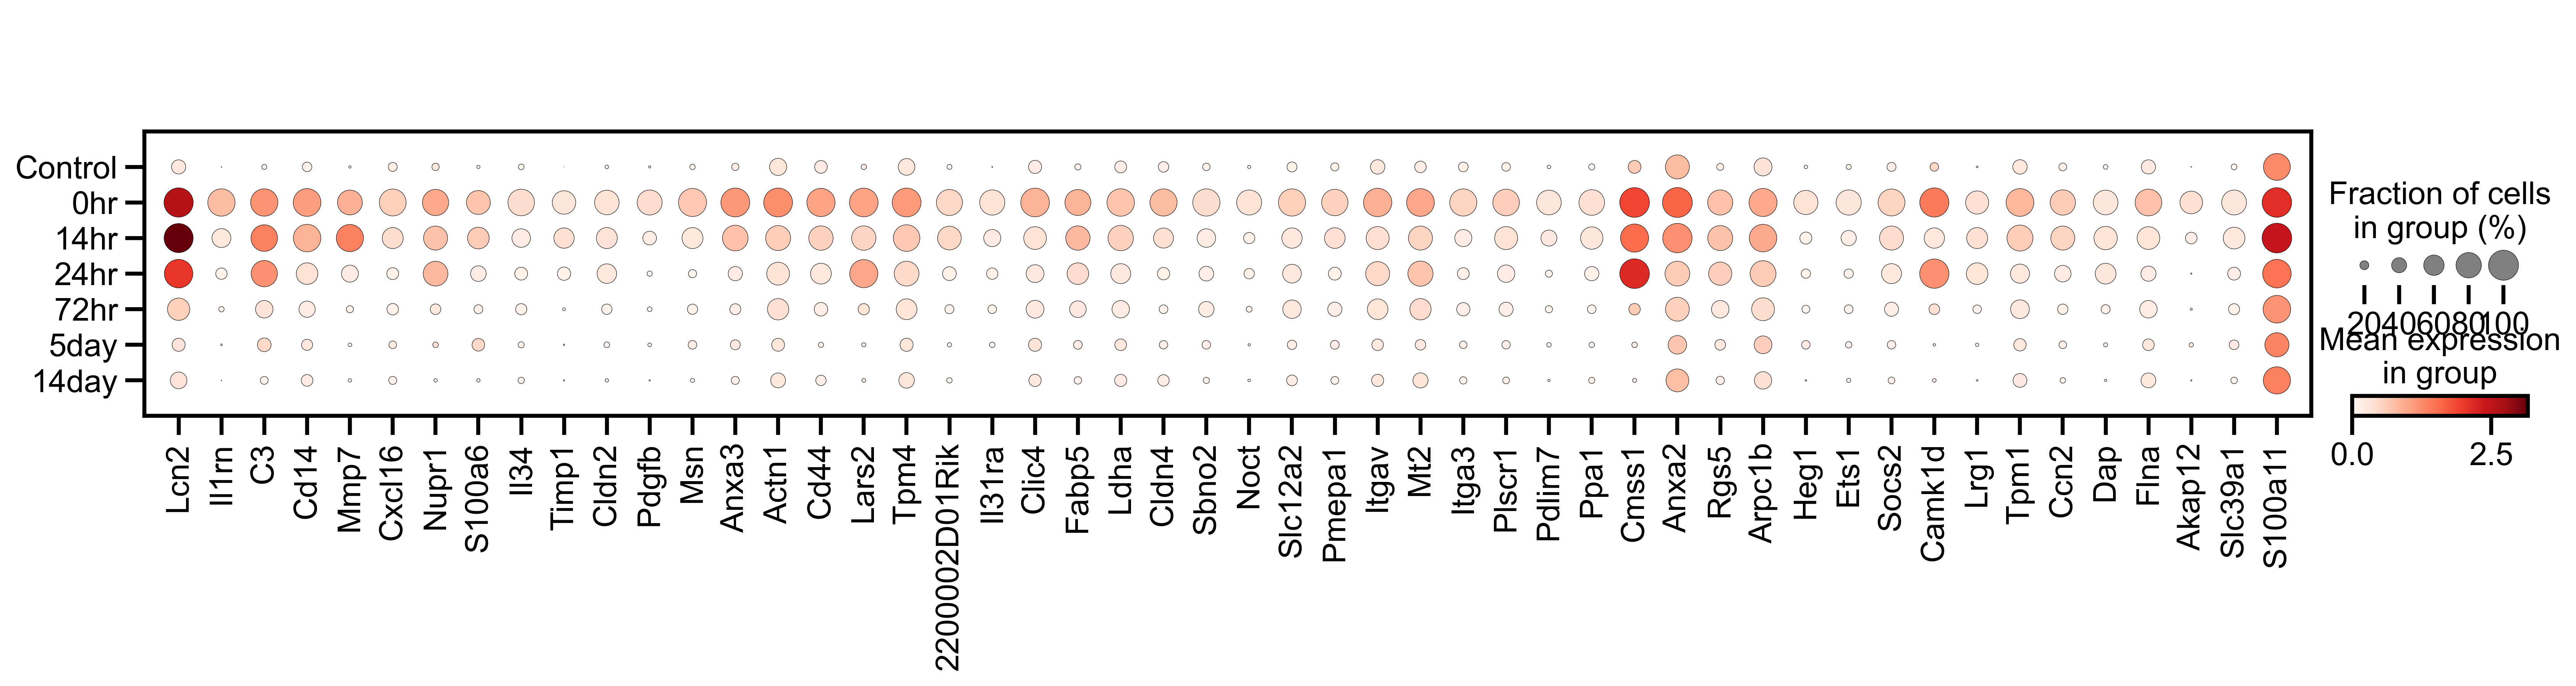

In [ ]:
sc.pl.dotplot(adata, markers,groupby='sample',layer='PFlog1pPF_normalization')

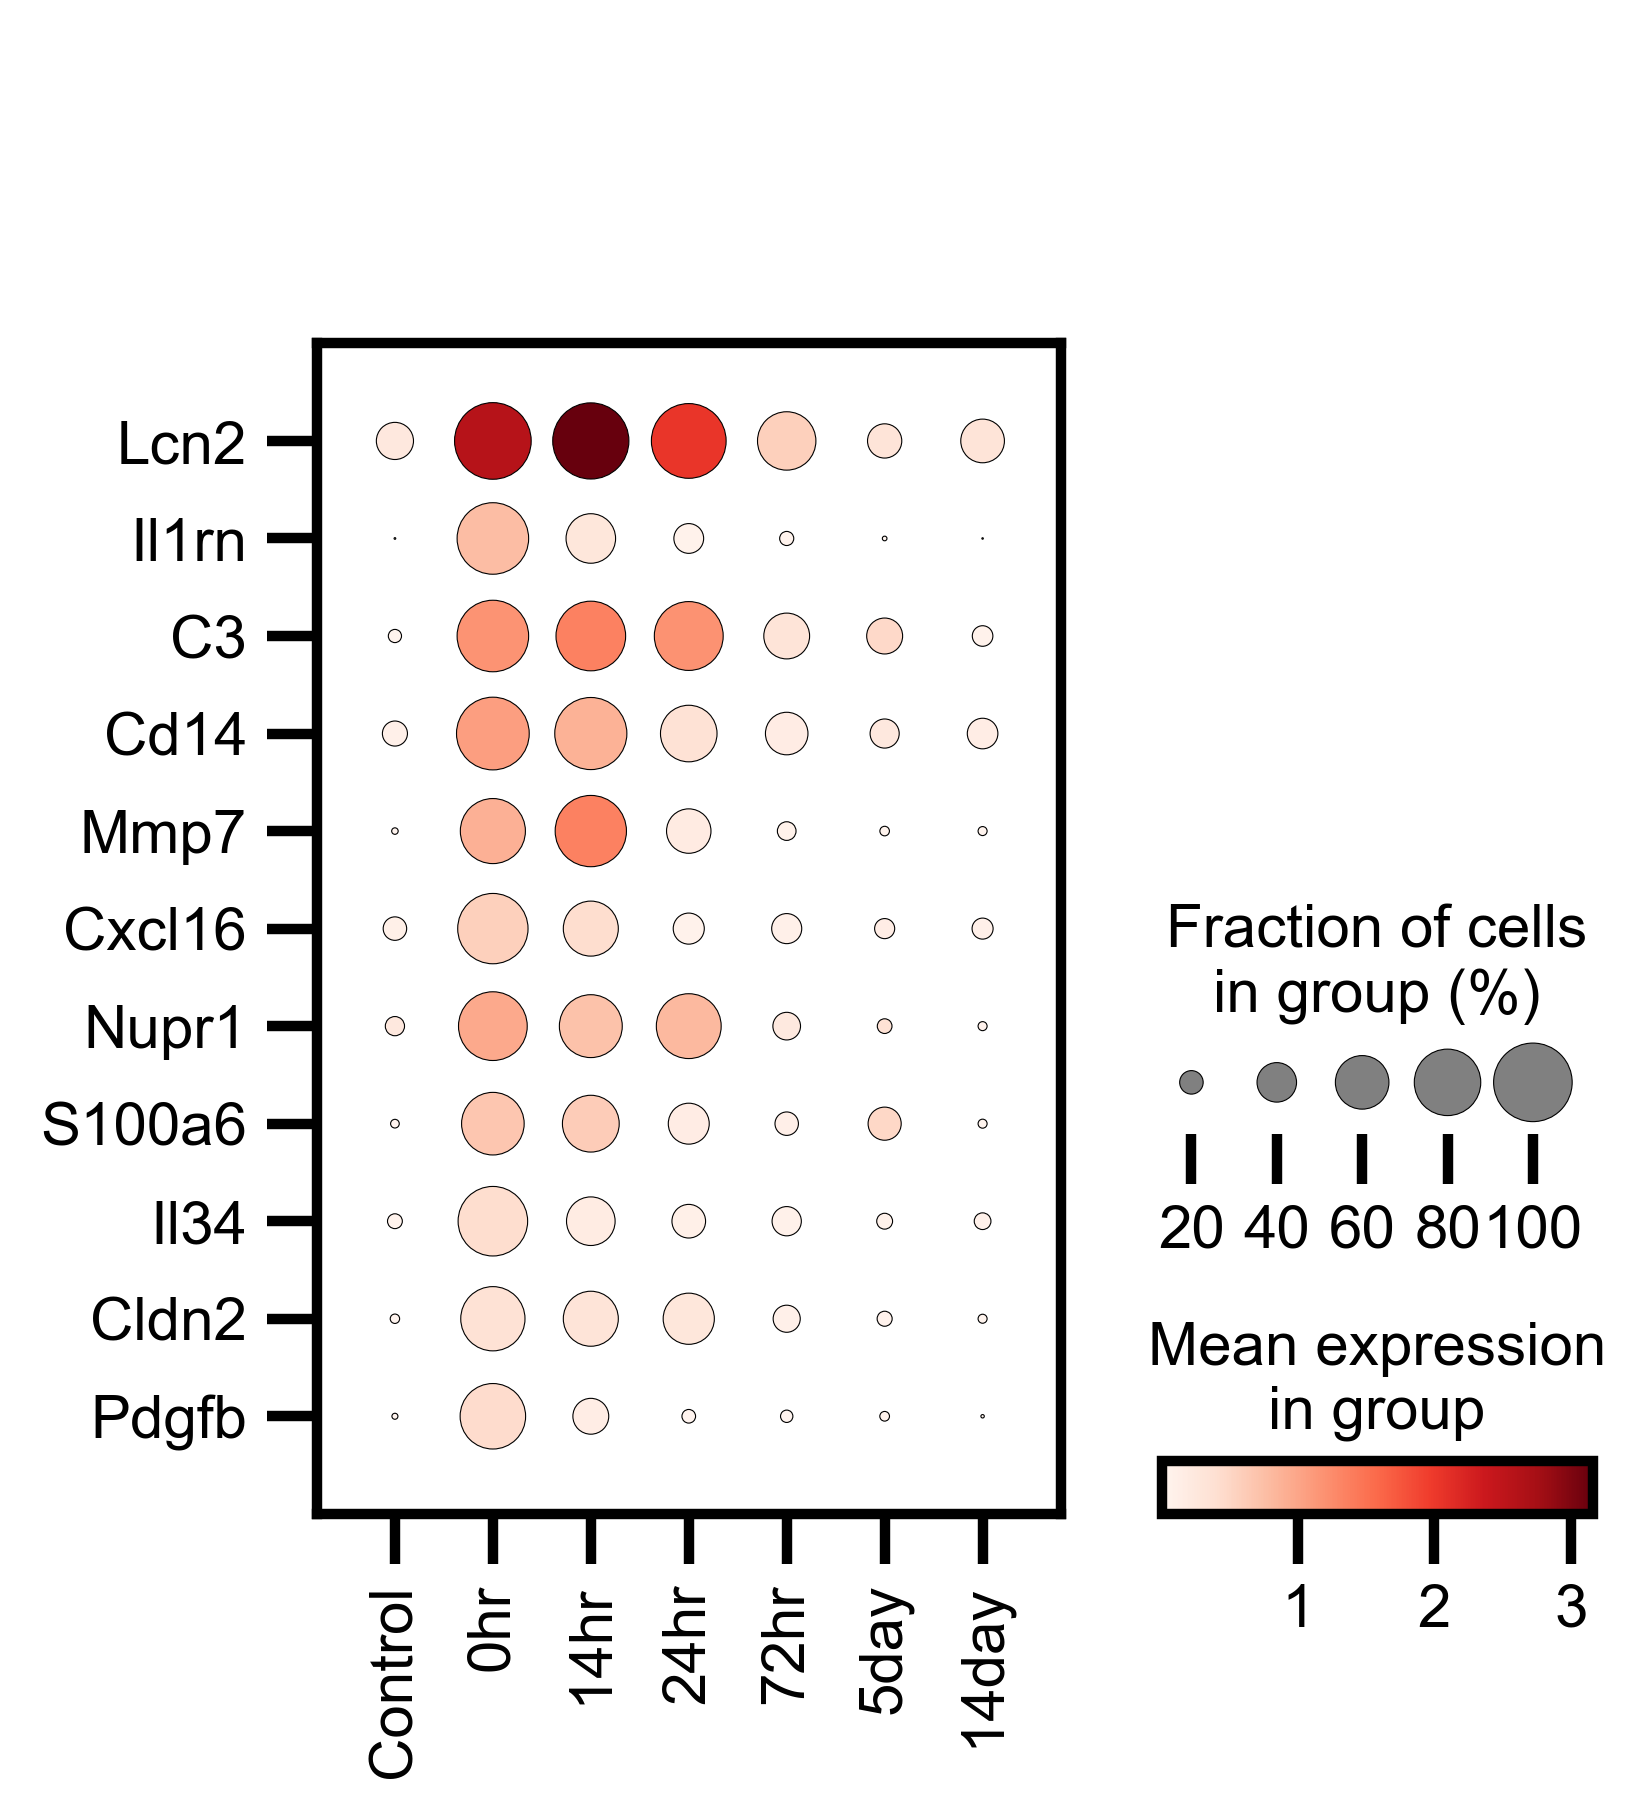

In [ ]:
pl.rcParams.update({'font.size': 13})
ax=sc.pl.dotplot(adata, topmarkers,groupby='sample',layer='PFlog1pPF_normalization',swap_axes=True)
pl.show()

#Endothelial

In [ ]:
adata=adata_all[adata_all.obs['annotated'].isin(['Endothelial']),:].copy()

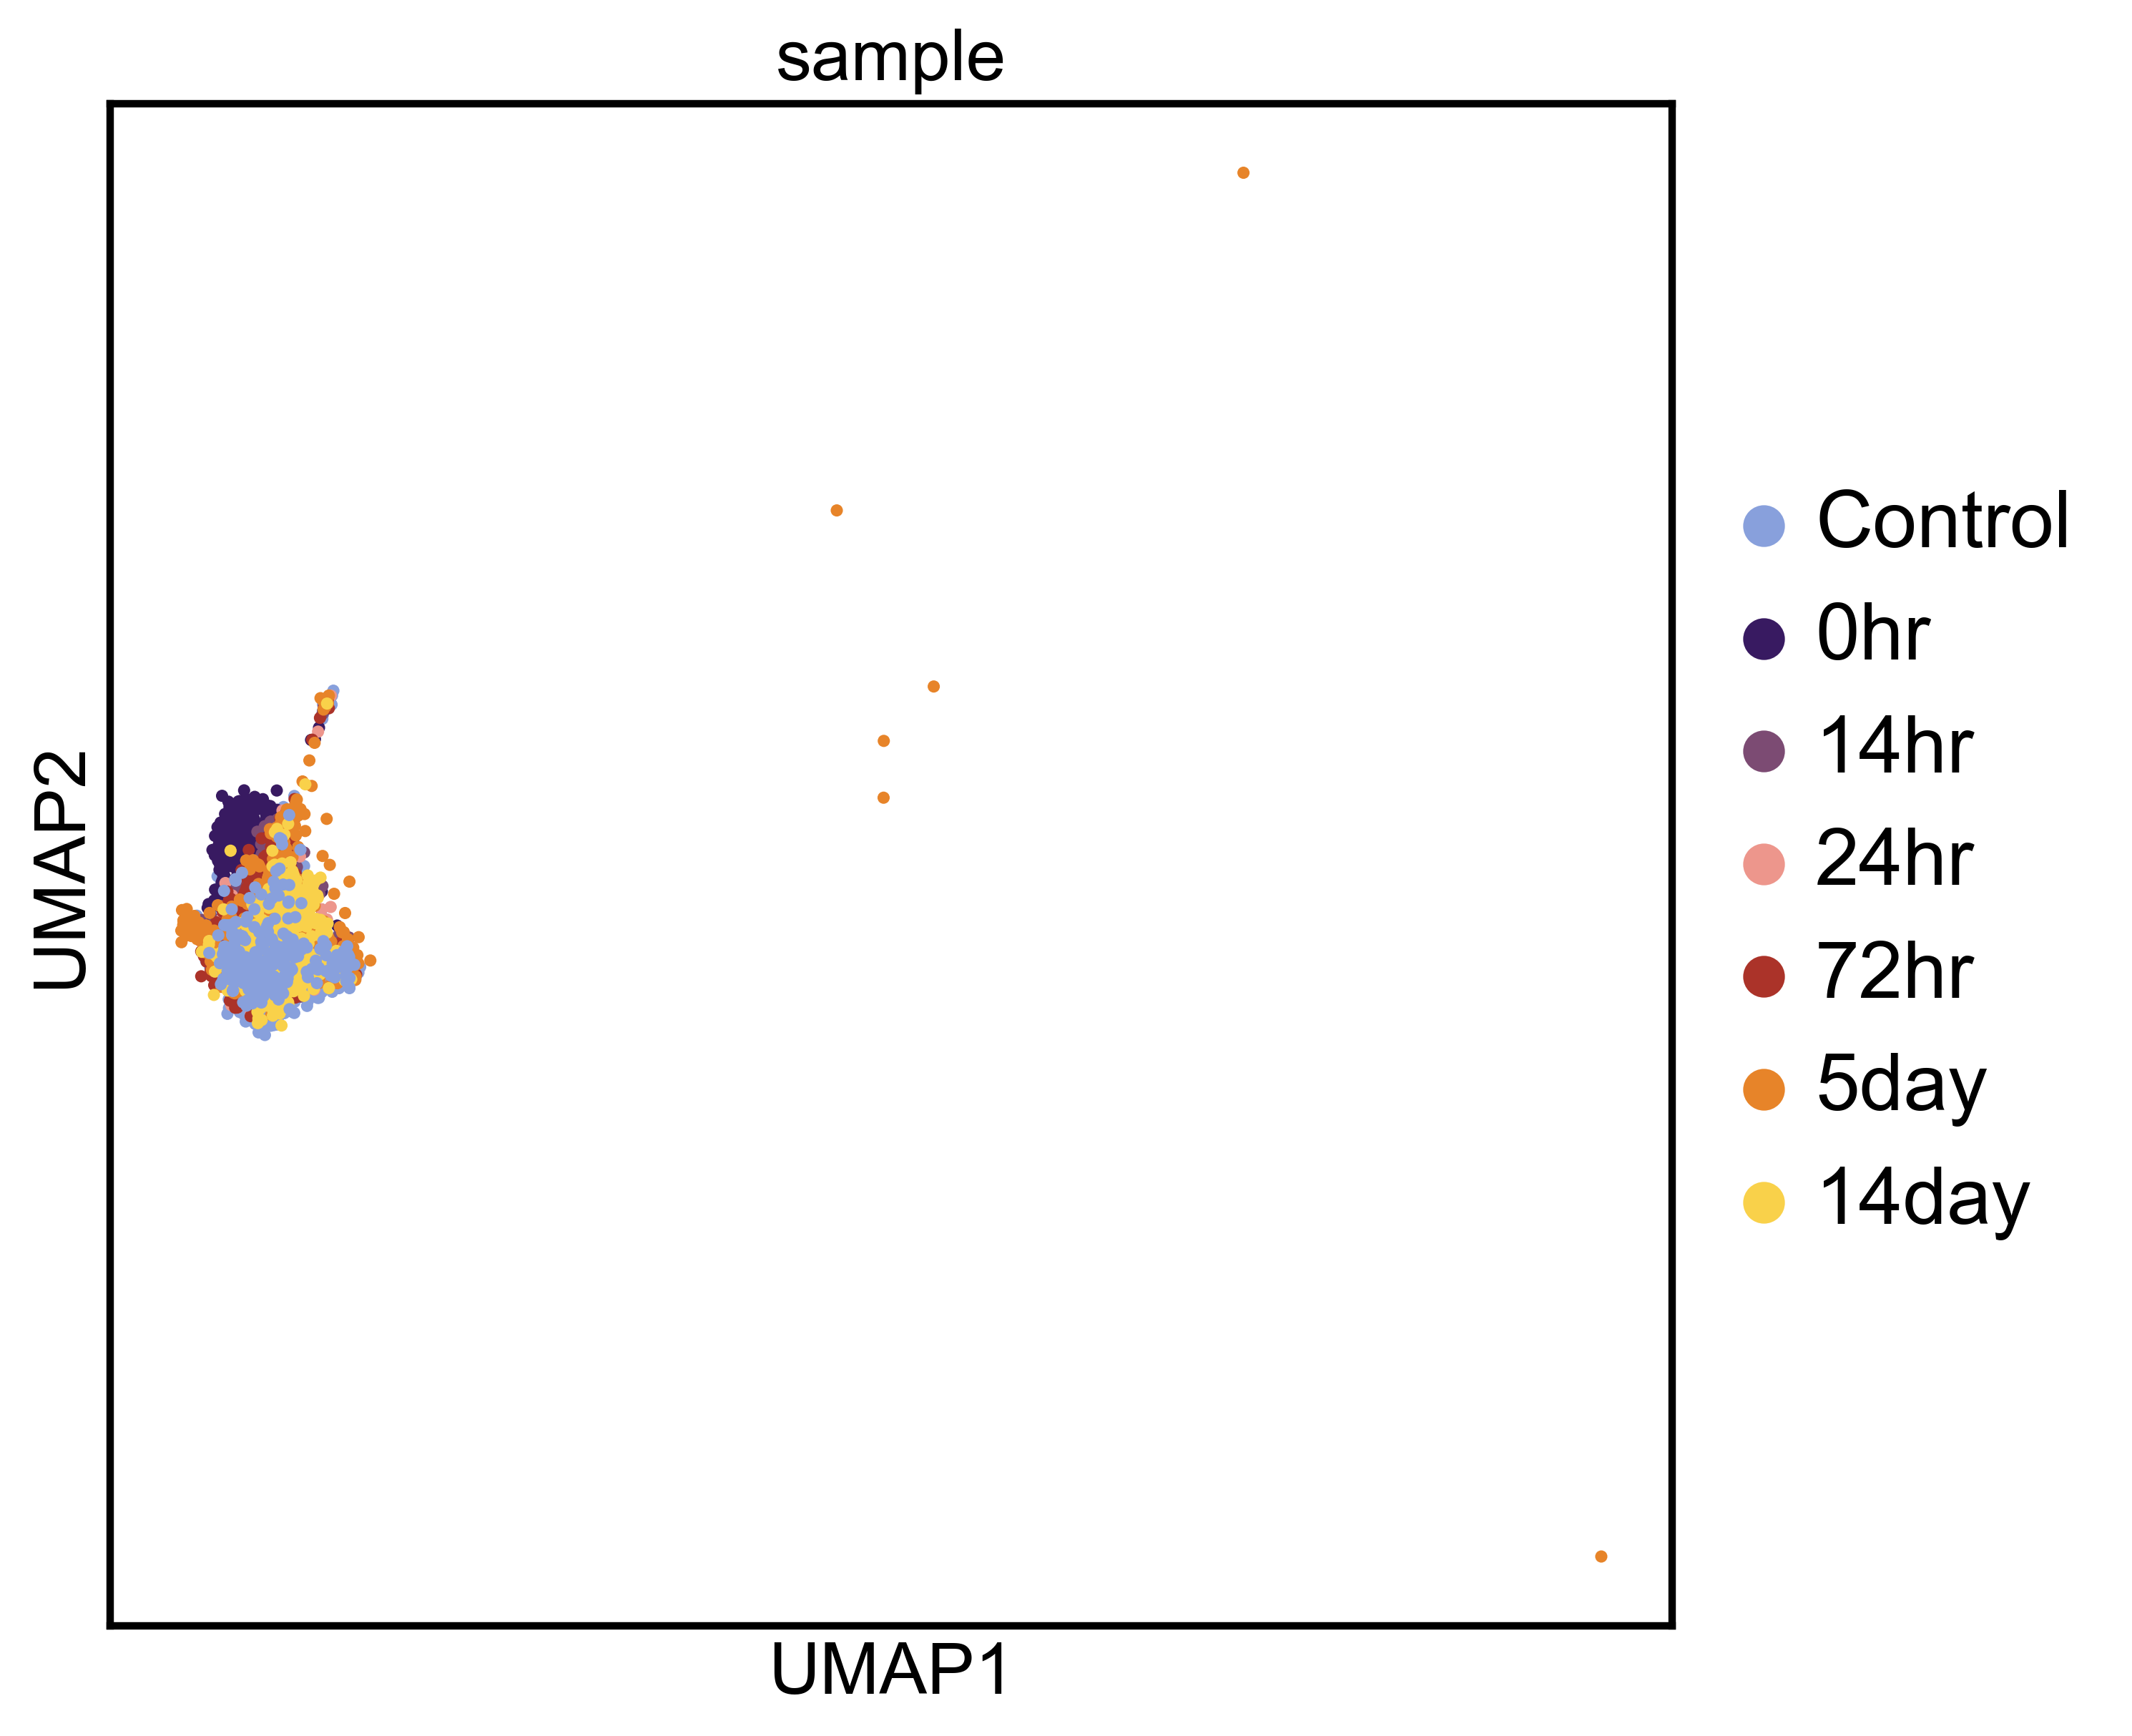

In [ ]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(7,7)
sc.pl.umap(adata, color=['sample'], palette=colors_time,legend_loc='right margin',legend_fontoutline=3,vmax='p99.9',legend_fontsize=20, legend_fontweight='normal',frameon=True)

##Renormalize subset


In [ ]:
adata.layers["counts"] = adata.layers['cellbender']
adata.X=adata.layers["counts"]
adata.layers["log_norm"]=sc.pp.log1p(sc.pp.normalize_total(adata,inplace=False,target_sum=1e4)["X"])
# proportional fitting to mean of cell depth
proportional_fitting = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1pPF_normalization"] = sc.pp.log1p(proportional_fitting["X"])

In [ ]:
adata.layers["PFlog1pPF_normalization"] = sc.pp.normalize_total(adata, target_sum=None, layer="log1pPF_normalization", inplace=False)["X"]


In [ ]:

adata1= adata[adata.obs['sample'].isin(['Control','0hr']),:].copy()
adata1

AnnData object with n_obs × n_vars = 1486 × 21686
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable'
    uns: 'QC_colors', 'a

####annotated_fine

In [ ]:
cluster_by="sample"

In [ ]:
# #method : {‘logreg’, ‘t-test’, ‘wilcoxon’, ‘t-test_overestim_var’} | None (default: None)
sc.tl.rank_genes_groups(adata1, cluster_by, method='wilcoxon',n_genes=adata.shape[1],layer='PFlog1pPF_normalization', rankby_abs=False,corr_method='bonferroni',key_added=f"wilcoxon_rank_groups_{cluster_by}" )
wilcoxon=pd.DataFrame(adata1.uns[f"wilcoxon_rank_groups_{cluster_by}"]['names']).head(100)
wilcoxon

Control      0hr
0     Cavin2    Cmss1
1      Ctrb1   Sema3f
2    Gm42418     Lrg1
3       Cd81    Lamb1
4   AW112010  Slco2a1
..       ...      ...
95      Snrk  Rpl36al
96     Itga1    Lamc1
97      Rgs5     Cmip
98      Tcim  Zcchc14
99   Laptm4a    Lima1

[100 rows x 2 columns]

In [ ]:
#wilcoxon
n= 50
wilcoxon=pd.DataFrame(adata1.uns[f"wilcoxon_rank_groups_{cluster_by}"]['names']).head(n)
markers=wilcoxon
wilcoxon1=markers.to_dict('list')


In [ ]:
markers=wilcoxon1['0hr']

In [ ]:
markers

['Cmss1', 'Sema3f', 'Lrg1', 'Lamb1', 'Slco2a1', 'Lars2', 'Vwa1', 'Adamts9', 'Inhbb', 'Camk1d', 'Pdlim1', 'Gphn', 'Synpo', 'Hexb', 'Il31ra', 'Cdk8', 'Adamts1', 'Gm26917', 'Ets1', 'Insr', 'Fxyd5', 'Sema6d', 'Tmem252', 'Cd93', 'Reep5', 'Il4ra', 'Grrp1', 'Ssr4', 'Hspa5', 'Sema7a', 'P4hb', 'Fkbp5', 'Gm10076', 'Sbno2', 'Ext1', 'Emp1', 'Tubb6', 'Tspan7', 'Uqcrq', 'Adamts4', 'Eif2s2', 'Atp1a1', 'Bcr', 'Xbp1', 'Nid1', 'Nus1', 'Mcam', 'Tgm2', 'Galnt18', 'Rpl41']

In [ ]:
markers=['Cmss1', 'Sema3f', 'Lrg1', 'Lamb1', 'Slco2a1', 'Lars2', 'Vwa1', 'Adamts9', 'Inhbb', 'Camk1d', 'Pdlim1', 'Gphn', 'Synpo',
         'Hexb', 'Il31ra', 'Cdk8', 'Adamts1', 'Gm26917', 'Ets1', 'Insr', 'Fxyd5', 'Sema6d', 'Tmem252', 'Cd93', 'Reep5',
         'Il4ra', 'Grrp1', 'Ssr4', 'Hspa5', 'Sema7a', 'P4hb', 'Fkbp5', 'Gm10076', 'Sbno2', 'Ext1', 'Emp1', 'Tubb6',
         'Tspan7', 'Uqcrq', 'Adamts4', 'Eif2s2', 'Atp1a1', 'Bcr', 'Xbp1', 'Nid1', 'Nus1', 'Mcam', 'Tgm2', 'Galnt18', 'Rpl41']


In [ ]:
topmarkers=['Sema3f', 'Lrg1', 'Vwa1', 'Adamts9', 'Inhbb', 'Ets1', 'Cd93','Mcam','Tgm2','Galnt18']


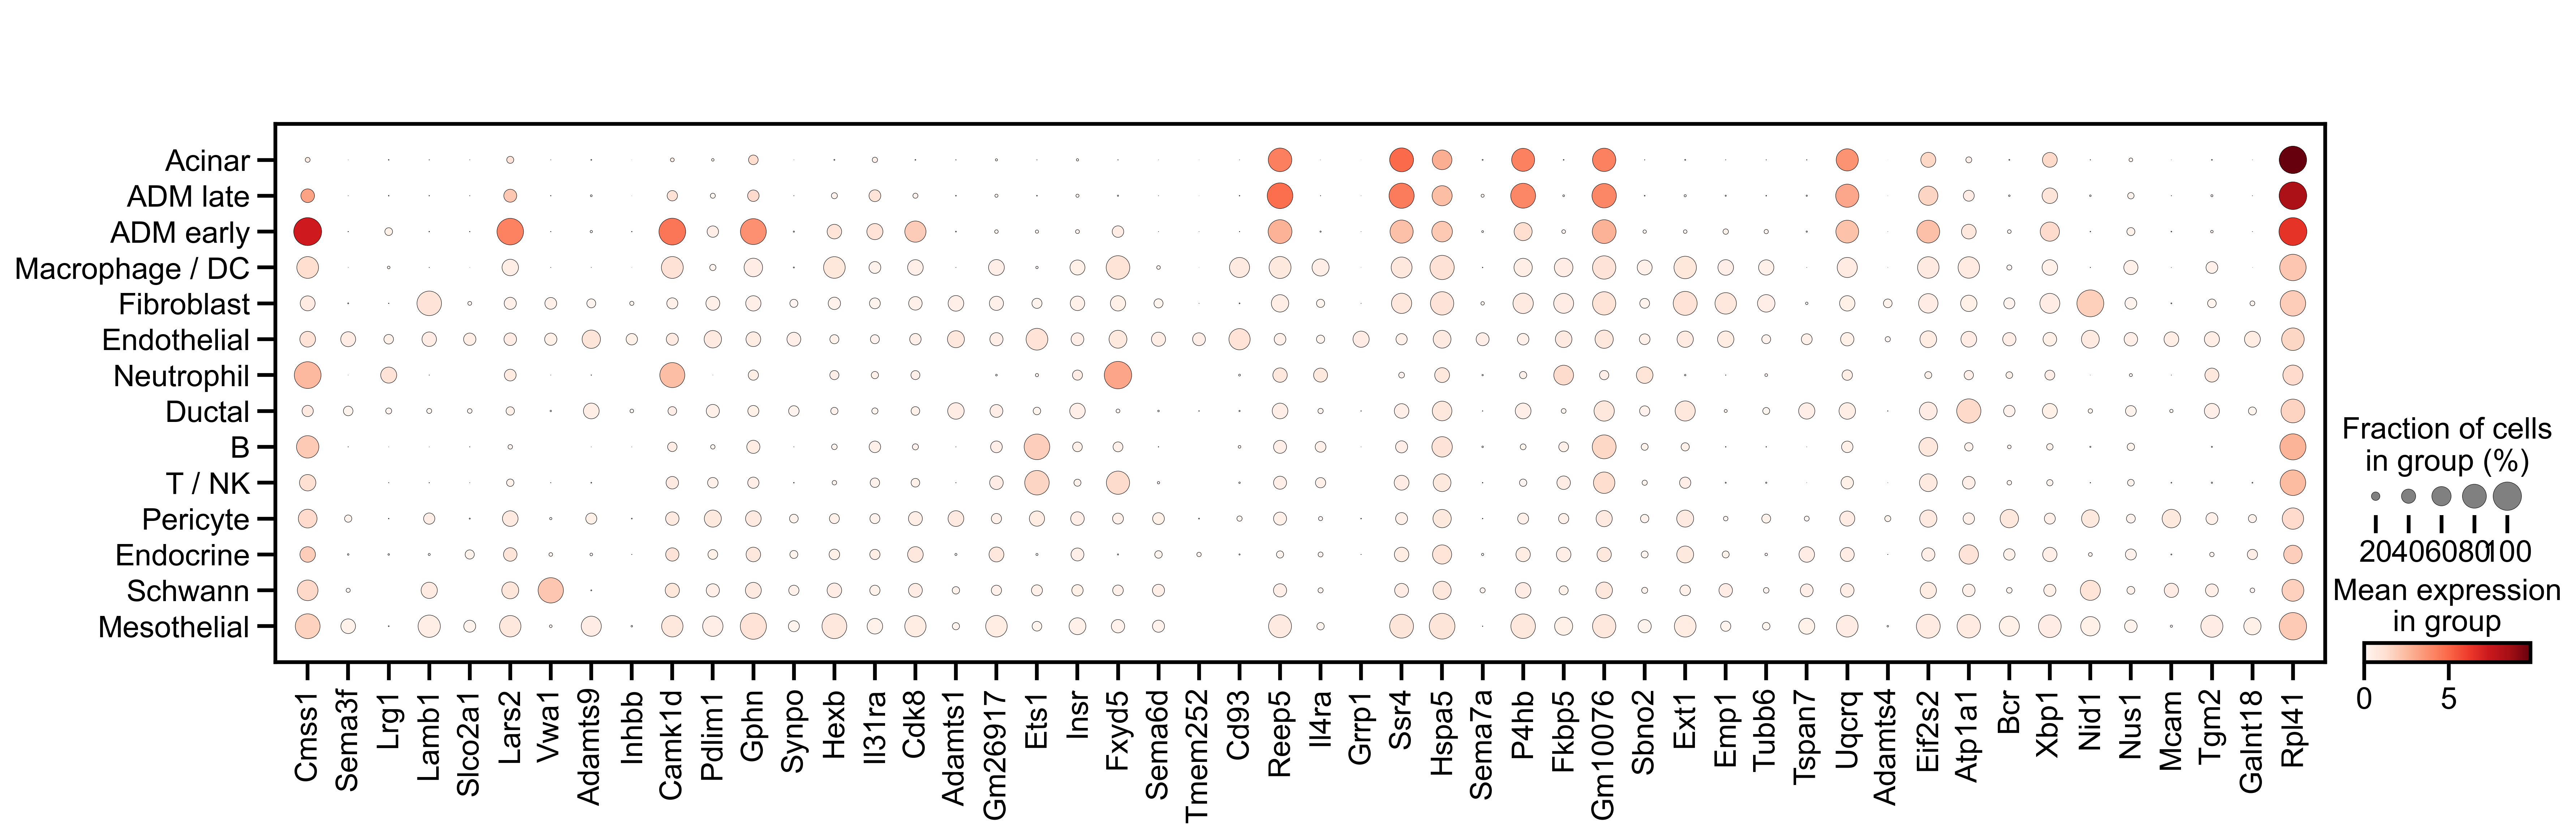

In [ ]:
sc.pl.dotplot(adata_all, markers,groupby='annotated_ADM',layer='PFlog1pPF_normalization')

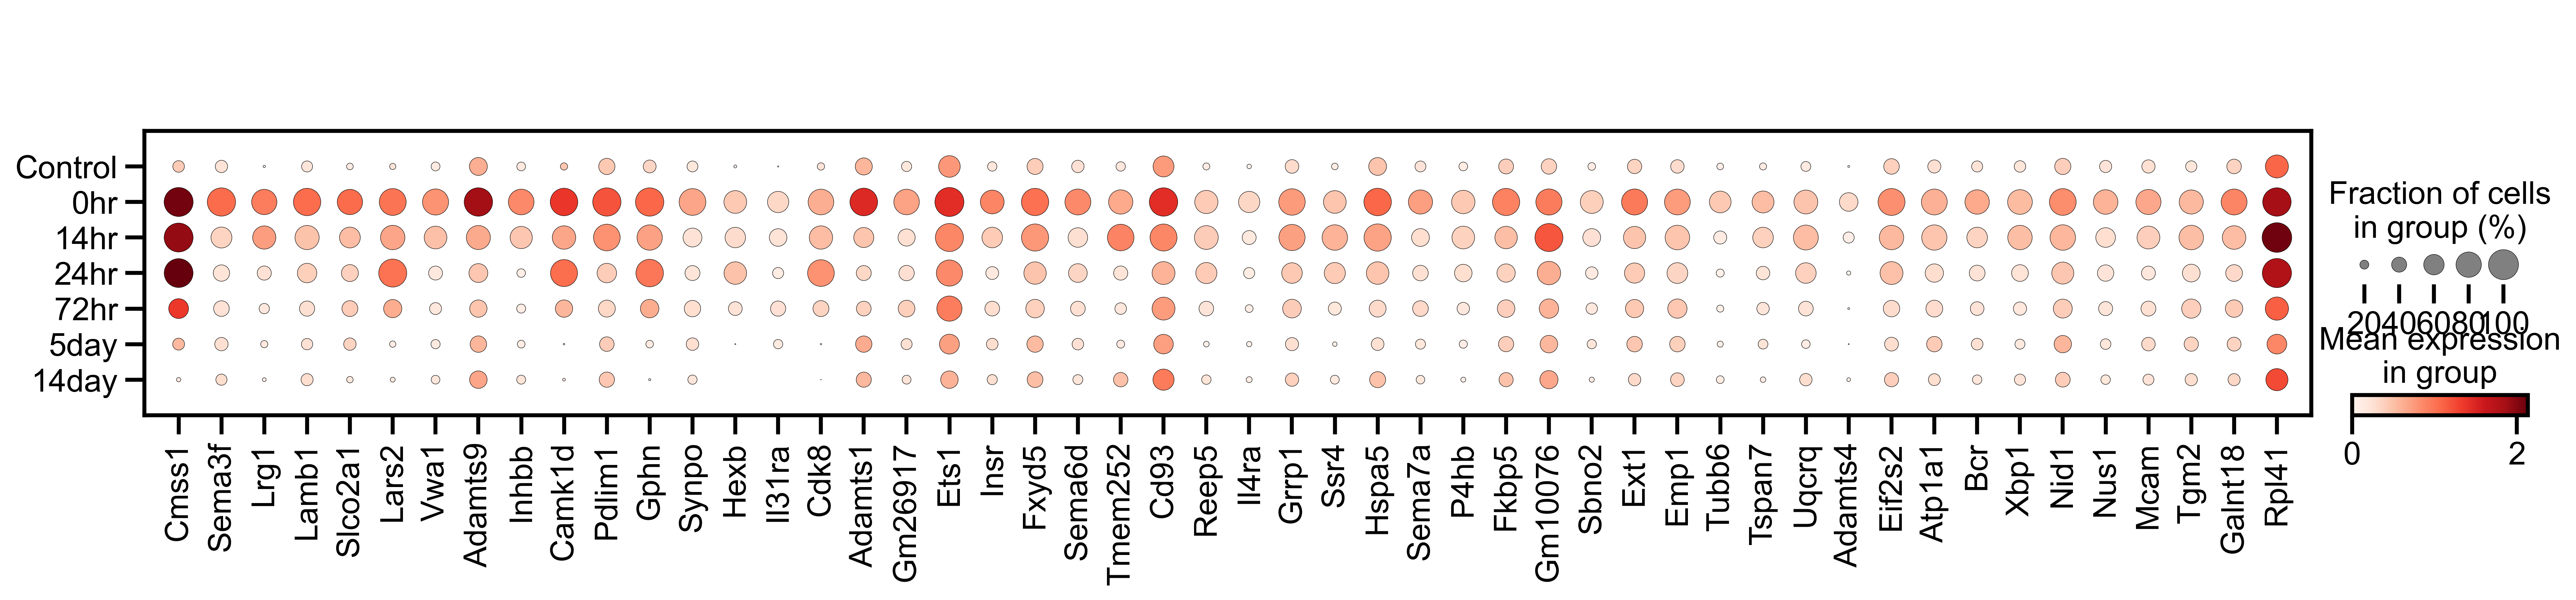

In [ ]:
sc.pl.dotplot(adata, markers,groupby='sample',layer='PFlog1pPF_normalization')

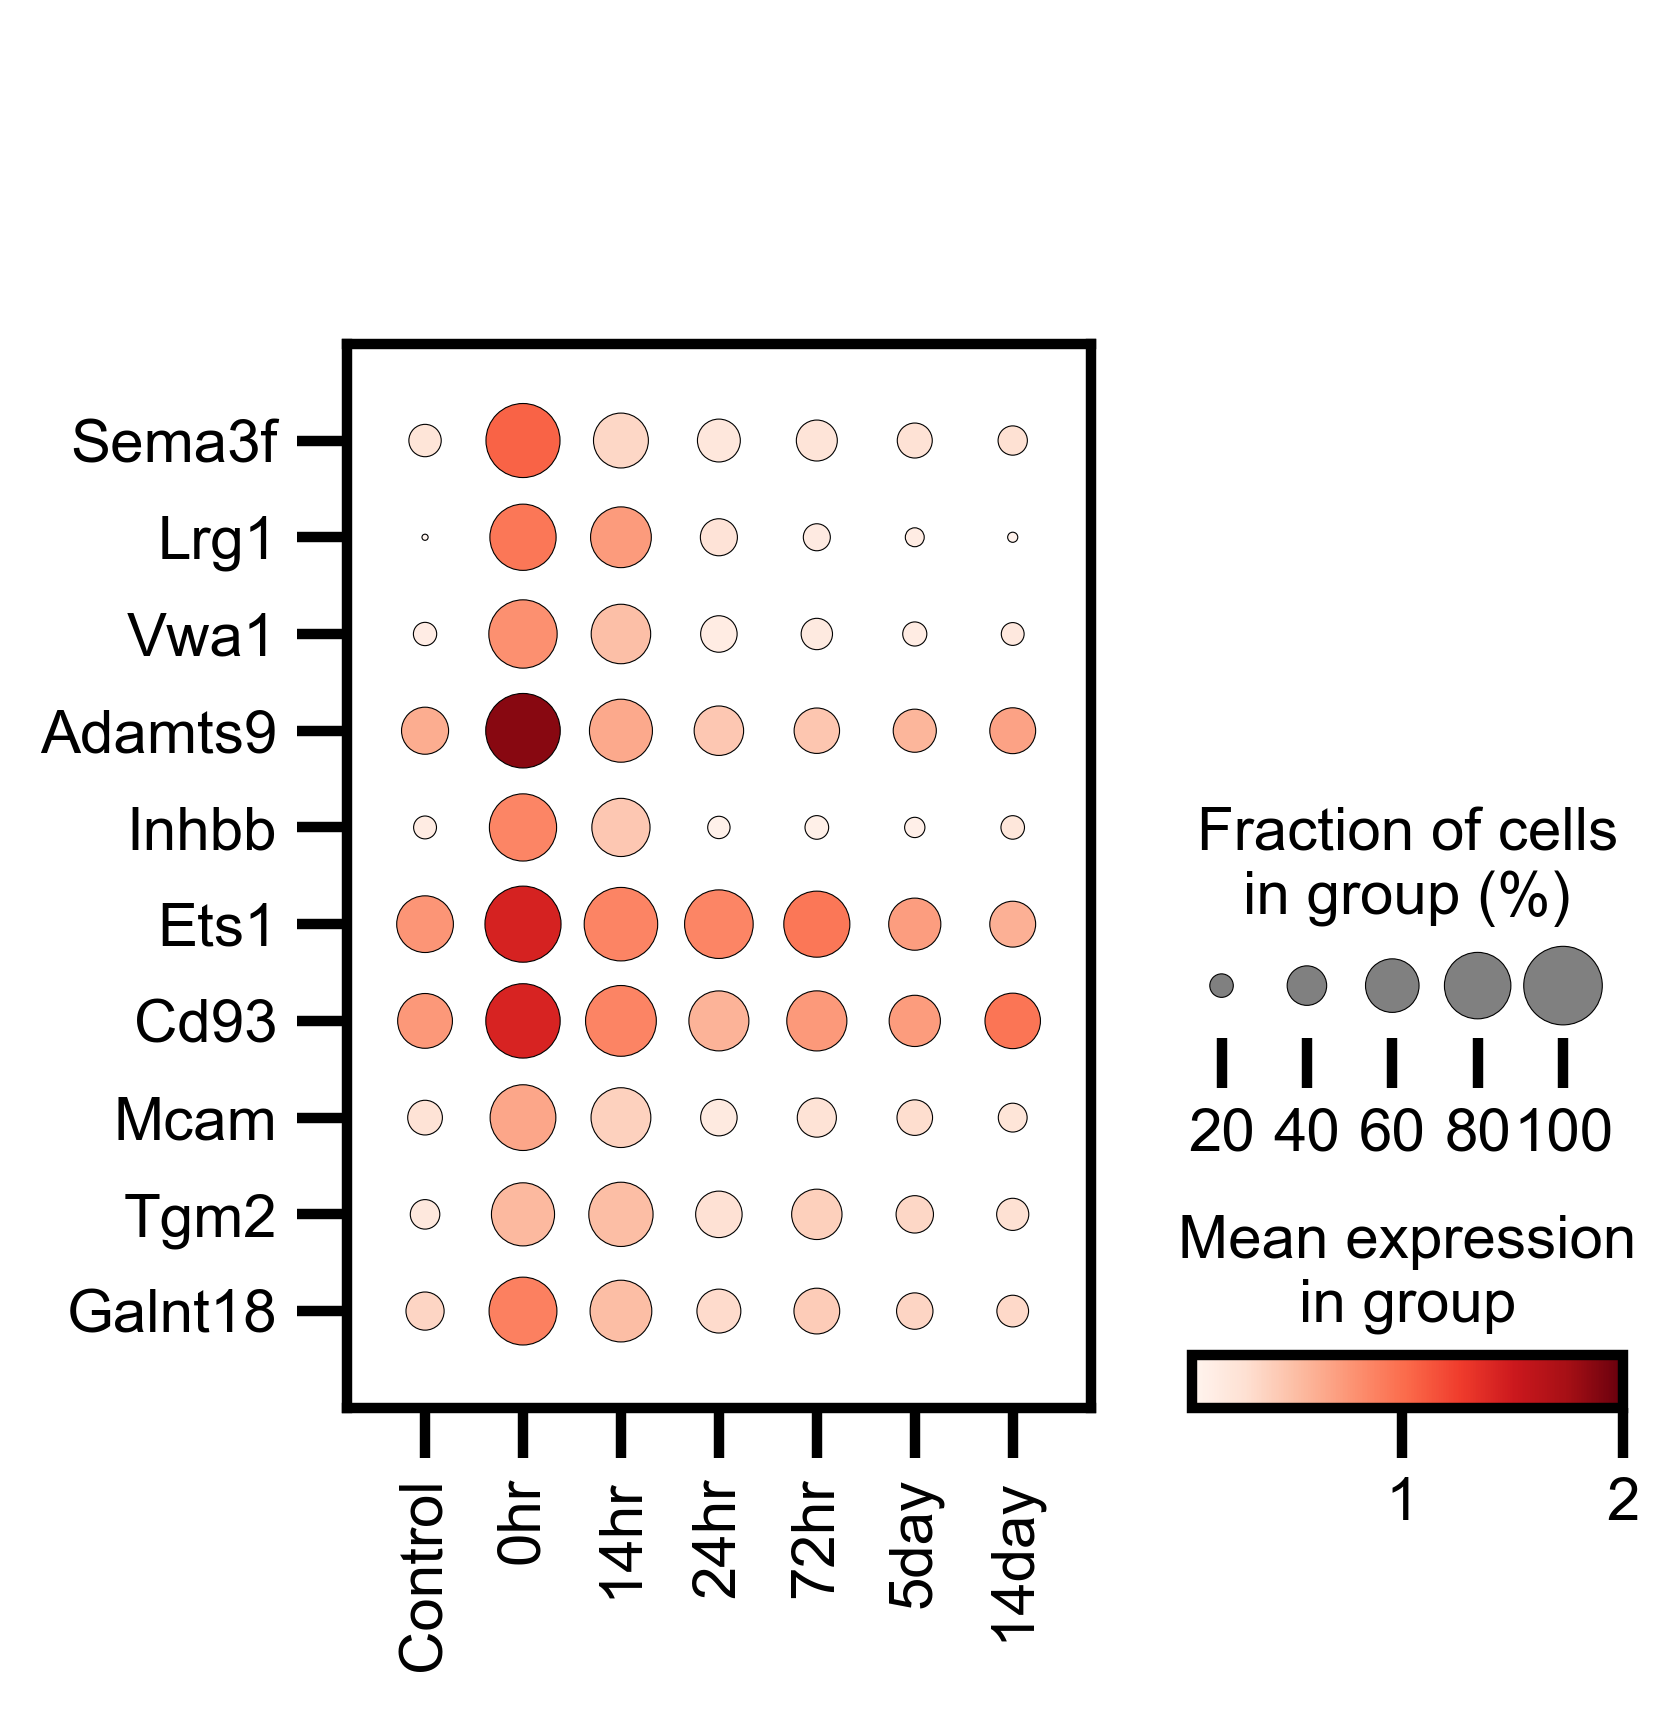

In [ ]:
pl.rcParams.update({'font.size': 13})
ax=sc.pl.dotplot(adata, topmarkers,groupby='sample',vmax=2,layer='PFlog1pPF_normalization',swap_axes=True)
pl.show()

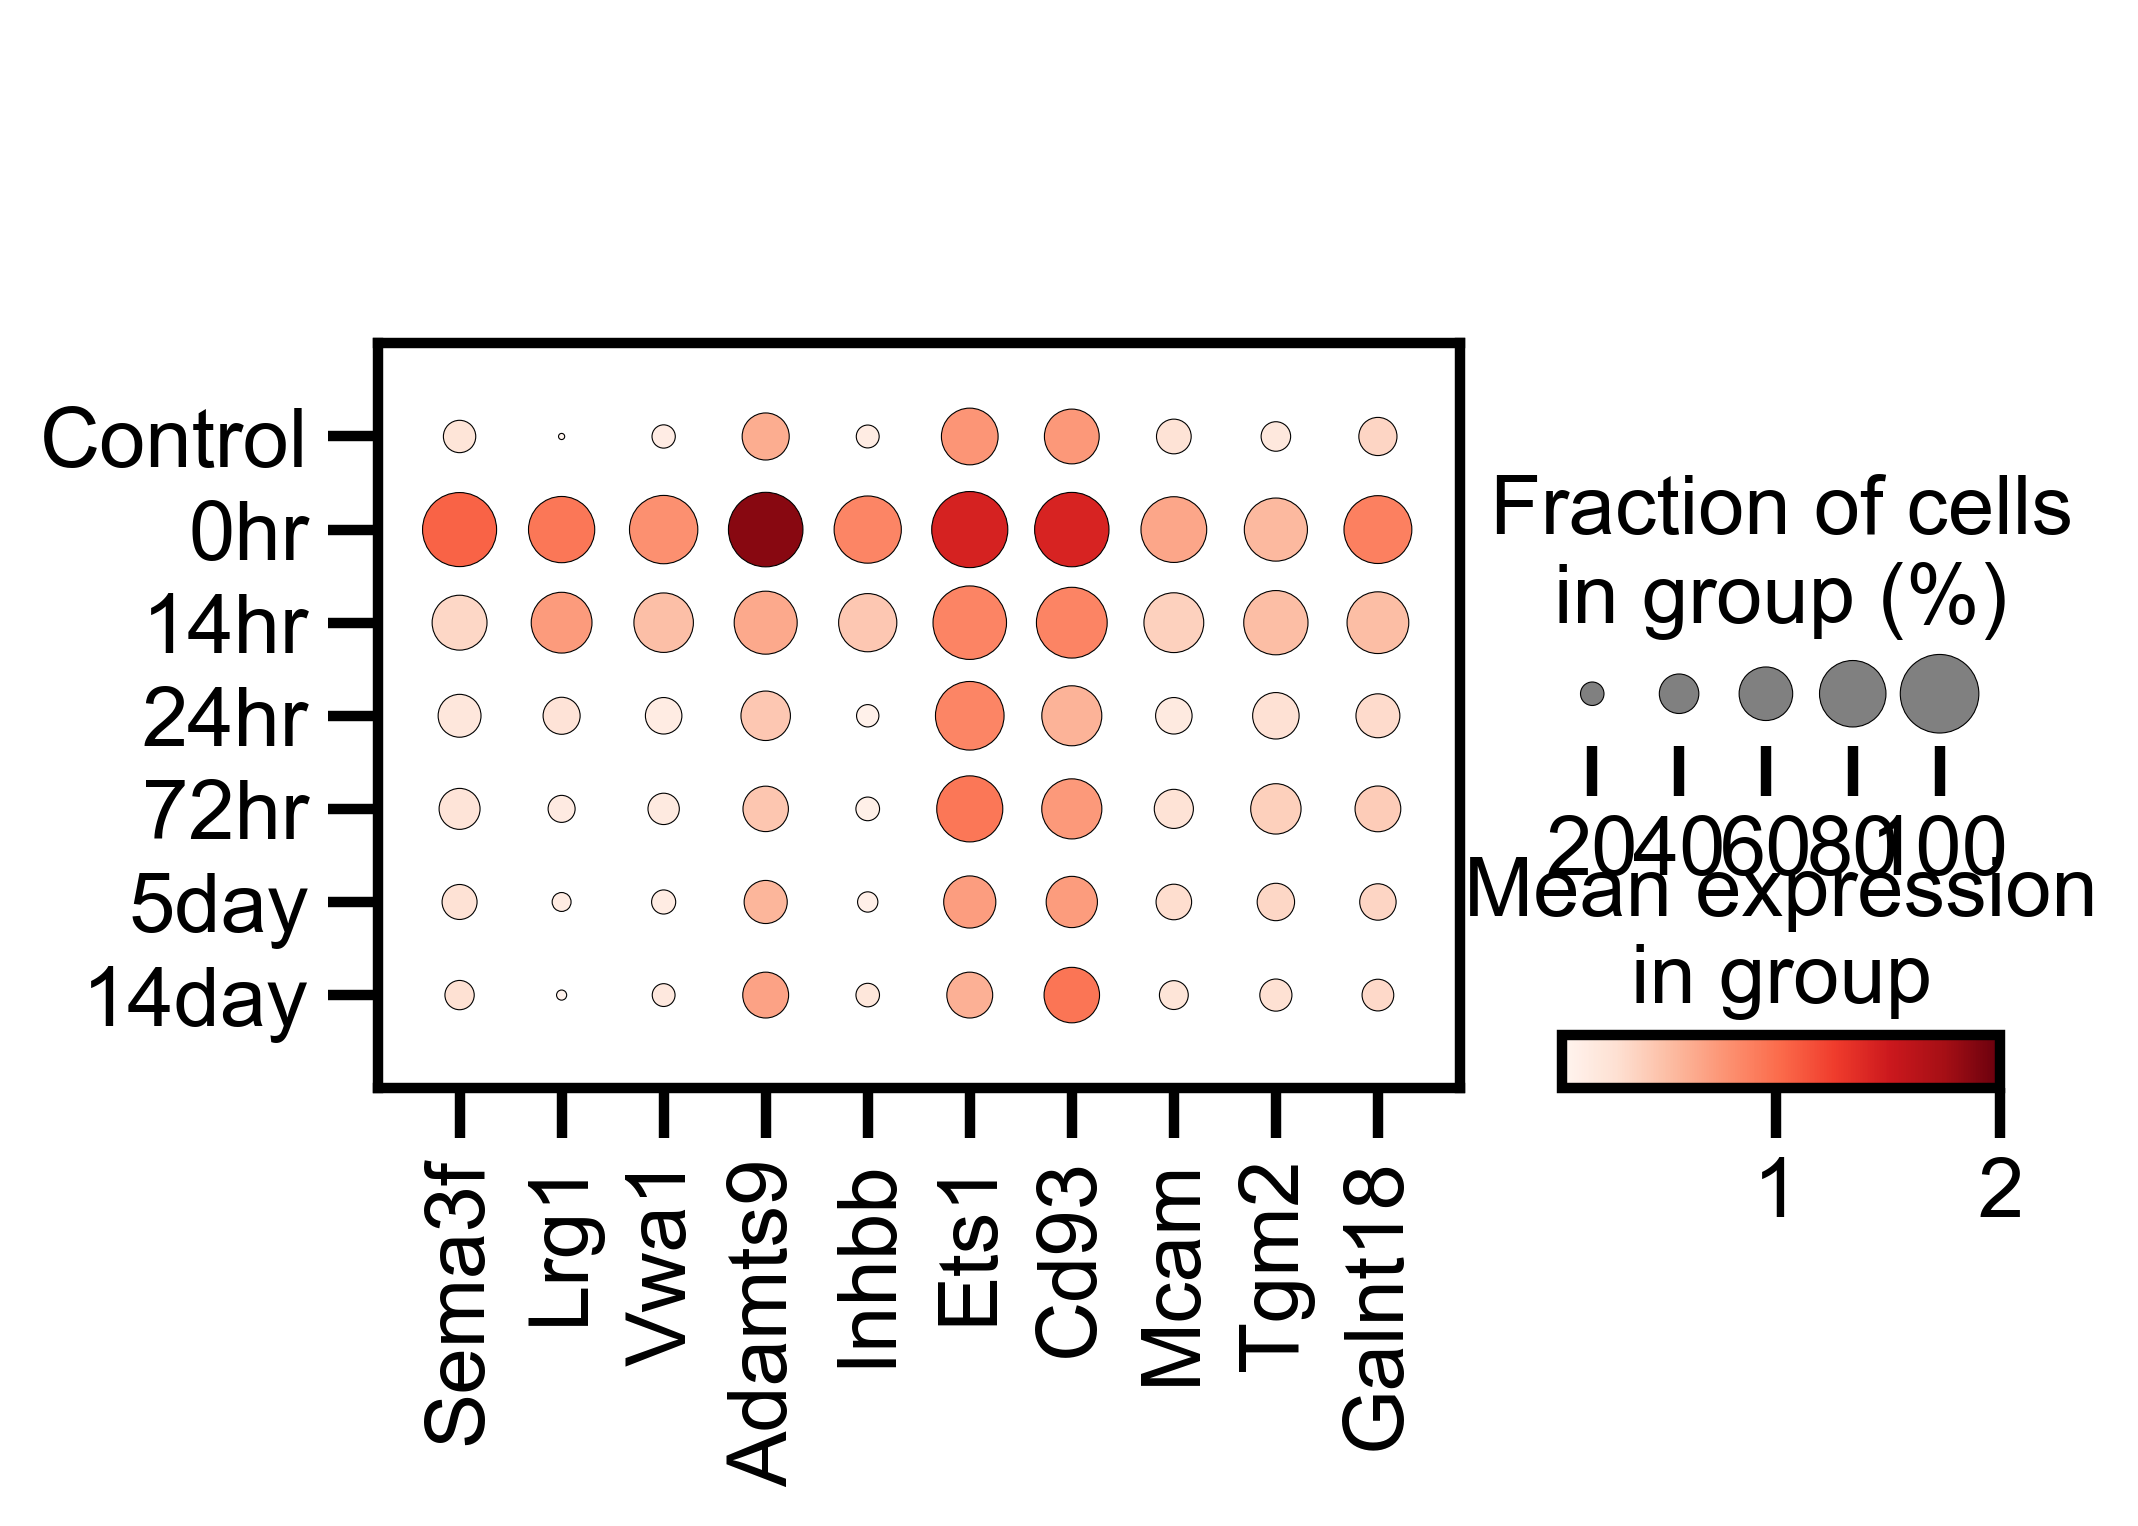

In [ ]:
sc.pl.dotplot(adata, topmarkers,groupby='sample',vmax=2,layer='PFlog1pPF_normalization')